### Příprava datových sad pro dolovací úlohy

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dolovací úloha: klasifikace druhů tučňáků na základě ostatních atributů

In [59]:
data = pd.read_csv("penguins_lter.csv")

### Odstranění irelevantních atributů

In [60]:
data = data[["Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]]
data.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0


### Chybějící hodnoty
Využijte alespoň dvě různé metody pro odstranění chybějících hodnot:

1) Ignorování záznamu

2) Doplnění chybějících hodnot - např. průměr, medián, modus, ... (pro celou sadu nebo pro danou třídu)

V první datové sadě budeme záznamy ignorovat, ve druhé doplníme jejich hodnotu průměrem.

In [61]:
# vytvoreni druhe datove sady
data2 = data

In [62]:
# chybejici hodnoty
empty = data[data.isnull().any(1)]
empty

/tmp/ipykernel_52028/218958157.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  empty = data[data.isnull().any(1)]


,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
3,Torgersen,NaN,NaN,NaN,NaN
339,Biscoe,NaN,NaN,NaN,NaN


In [63]:
# ignorovani zaznamu v prvni sade
data = data[~data.isnull().any(1)]

/tmp/ipykernel_52028/969702303.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data[~data.isnull().any(1)]


In [64]:
# nahrazeni chybejici hodnoty prumerem ve druhe sade
cl = data2["Culmen Length (mm)"].to_numpy().reshape(-1,1)
cd = data2["Culmen Depth (mm)"].to_numpy().reshape(-1,1)
fl = data2["Flipper Length (mm)"].to_numpy().reshape(-1,1)
bm = data2["Body Mass (g)"].to_numpy().reshape(-1,1)

data2["Culmen Length (mm)"] = data2["Culmen Length (mm)"].fillna(np.nanmean(cl))
data2["Culmen Depth (mm)"] = data2["Culmen Depth (mm)"].fillna(np.nanmean(cd))
data2["Flipper Length (mm)"] = data2["Flipper Length (mm)"].fillna(np.nanmean(fl))
data2["Body Mass (g)"] = data2["Body Mass (g)"].fillna(np.nanmean(bm))

### Odlehlé hodnoty

In [65]:
def find_outliers(cl):
    # finding the 1st quartile
    q1 = np.quantile(cl, 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(cl, 0.75)
    med = np.median(cl)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = cl[(cl <= lower_bound) | (cl >= upper_bound)]
    print('The following are the outliers in the boxplot:{}'.format(outliers))

In [66]:
# second dataset
find_outliers(cl)
find_outliers(cd)
find_outliers(fl)
find_outliers(bm)

The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]


### Diskretizácia numerických atribútov

Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy


Body Mass - equi-width

/tmp/ipykernel_52028/4120563604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Body Mass cat"] =  pd.cut(data["Body Mass (g)"], bins=5, labels = ["ľahký", "ok", "ťažký", "masívny", "monumentálny"])


Text(0.5, 1.0, 'Body Mass cat')

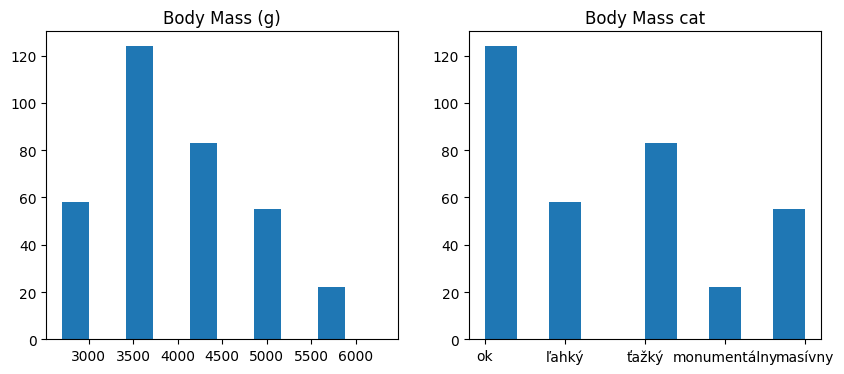

In [67]:
data["Body Mass cat"] =  pd.cut(data["Body Mass (g)"], bins=5, labels = ["ľahký", "ok", "ťažký", "masívny", "monumentálny"])
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(data["Body Mass (g)"], 5, width=300)
ax[0].set_title("Body Mass (g)")
ax[1].hist(data["Body Mass cat"])
ax[1].set_title("Body Mass cat")

Flipper Length - equi depth

/tmp/ipykernel_52028/1116993443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Flipper Length cat"] =  pd.qcut(data["Flipper Length (mm)"], q=5, labels = ["kratučký", "krátky", "normálny", "dlhý", "dlhatý"])


Text(0.5, 1.0, 'Flipper Length cat')

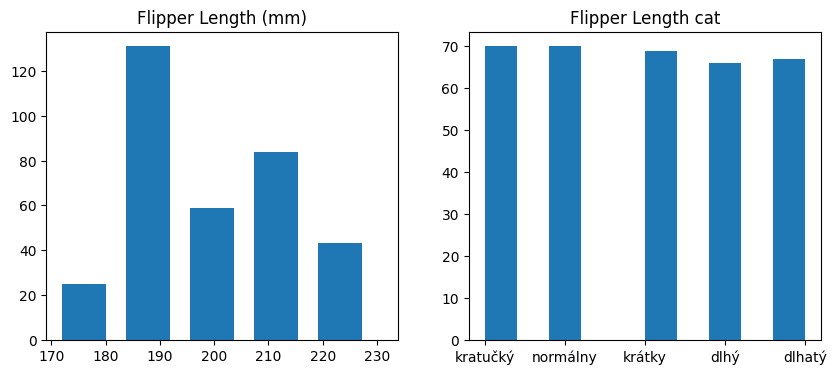

In [68]:
# pouzijeme equi-depth binning aby sa vyrovnalo rozdelenie
data["Flipper Length cat"] =  pd.qcut(data["Flipper Length (mm)"], q=5, labels = ["kratučký", "krátky", "normálny", "dlhý", "dlhatý"])
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(data["Flipper Length (mm)"], 5, width=8)
ax[0].set_title("Flipper Length (mm)")
ax[1].hist(data["Flipper Length cat"])
ax[1].set_title("Flipper Length cat")

Culmen Depth - equi width

/tmp/ipykernel_52028/2761838845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Culmen Depth cat"] =  pd.cut(data["Culmen Depth (mm)"], bins=5, labels = ["plytký", "menej_plytký", "klasický", "hlboký", "bezodný"])


Text(0.5, 1.0, 'Culmen Depth cat')

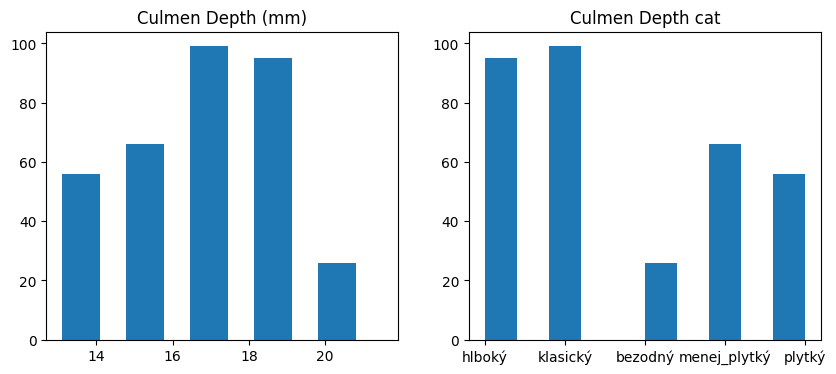

In [69]:
data["Culmen Depth cat"] =  pd.cut(data["Culmen Depth (mm)"], bins=5, labels = ["plytký", "menej_plytký", "klasický", "hlboký", "bezodný"])
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(data["Culmen Depth (mm)"], 5, width=1)
ax[0].set_title("Culmen Depth (mm)")
ax[1].hist(data["Culmen Depth cat"])
ax[1].set_title("Culmen Depth cat")

Culmen Length - equi width

/tmp/ipykernel_52028/1949664149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Culmen Length cat"] =  pd.cut(data["Culmen Length (mm)"], bins=5, labels=["kratučký", "krátky", "normálny", "dlhý", "dlhatý"])


Text(0.5, 1.0, 'Culmen Length cat')

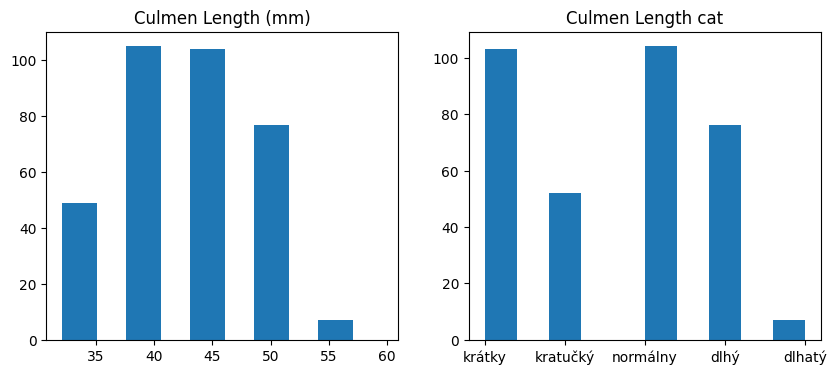

In [70]:
data["Culmen Length cat"] =  pd.cut(data["Culmen Length (mm)"], bins=5, labels=["kratučký", "krátky", "normálny", "dlhý", "dlhatý"])
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(data["Culmen Length (mm)"], 5, width=3)
ax[0].set_title("Culmen Length (mm)")
ax[1].hist(data["Culmen Length cat"])
ax[1].set_title("Culmen Length cat")

In [53]:
data.drop(["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"], axis=1, inplace=True)

/tmp/ipykernel_52028/4240905790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"], axis=1, inplace=True)


In [54]:
data

,Island,Body Mass cat,Flipper Length cat,Culmen Depth cat,Culmen Length cat
0,Torgersen,ok,kratučký,c_depth_4,c_length_2
1,Torgersen,ok,kratučký,c_depth_3,c_length_2
2,Torgersen,ľahký,normálny,c_depth_3,c_length_2
4,Torgersen,ok,krátky,c_depth_4,c_length_1
5,Torgersen,ok,krátky,c_depth_5,c_length_2
...,...,...,...,...,...
338,Biscoe,masívny,dlhý,c_depth_1,c_length_3
340,Biscoe,ťažký,dlhý,c_depth_1,c_length_3
341,Biscoe,monumentálny,dlhatý,c_depth_2,c_length_4
342,Biscoe,masívny,dlhý,c_depth_2,c_length_3


### Normalizacia numerickych atributov, transformacia kategorickych na numericke

One-hot encoding Island

In [55]:
one_hot = pd.get_dummies(data2['Island'])
data2.drop('Island',axis = 1, inplace=True)
data2 = data2.join(one_hot)

min max normalizacia vsetkych numerickych atributov

In [56]:
def normalize(df, cols):
    for col in cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())   

normalize(data2, ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]) 

In [57]:
data2

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Biscoe,Dream,Torgersen
0,0.254545,0.666667,0.152542,0.291667,0,0,1
1,0.269091,0.511905,0.237288,0.305556,0,0,1
2,0.298182,0.583333,0.389831,0.152778,0,0,1
3,0.429888,0.482282,0.490088,0.417154,0,0,1
4,0.167273,0.738095,0.355932,0.208333,0,0,1
...,...,...,...,...,...,...,...
339,0.429888,0.482282,0.490088,0.417154,1,0,0
340,0.534545,0.142857,0.728814,0.597222,1,0,0
341,0.665455,0.309524,0.847458,0.847222,1,0,0
342,0.476364,0.202381,0.677966,0.694444,1,0,0
